# THINNING ALGORITHM 

---
# Introduction

In this project, we implement the thinning algorithm to simulate Hawkes process. 

First, we implement the algorithm. We write a function with input T, lambda_0, alpha, beta and output a list/array/vector with all the arrival times in [0; T] for the Hawkes process with parameters lambda_0, alpha, beta.

Then, for T > 0 fixed, we run some tests and comment on the role of the parameters lambda_0, alpha, beta in the following
situations. 
- If alpha, beta are fixed and we increase lambda_0, what happens to the outcome of the simulation? 
- If lambda_0, alpha are fixed and we increase beta, what happens to the outcome of the simulation?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

---
# Implement the Function

We first implement a function that takes into inputs T, lambda_0, alpha and beta in Python. The Thinning algorithm gives us all the Arrival Times as well as the Intensities as outputs. We plot these two data in order to visualize the results of this algorithm.

In [2]:
def thinning_algo(T, lambda_0, alpha, beta):     #Inputs
    
    #Initialize t = 0, i = 0, T_0 = 0
    t = 0
    i = 0
    T_0 = 0
    Arrival_times = [T_0]
    Intensity_function = [lambda_0]
    
    #While t<T, do the manipulations
    while t < T:
        
        #Compute lambda star
        l_star = lambda_0
        if i >= 1:
            for k in range(0,i+1):
                l_star += alpha * np.exp( -beta*(t-Arrival_times[k]) )
        
        #Compute ksi with a sample of U_tilt from Uniform([0,1])
        U_tilt = np.random.uniform()
        ksi = -np.log(U_tilt) / l_star
        
        #Update t
        t = t + ksi
        
        #Sample from Uniform([0,1])
        U = np.random.uniform()
        
        #Compute lambda_t
        l_t = lambda_0
        if i >= 1:
            for k in range(0,i+1):
                l_t += alpha * np.exp( -beta*(t-Arrival_times[k]) )
                
        #Condition on U
        if U <= l_t / l_star:
            
            #Update i
            i = i+1
            
            #Define T_i
            T_i = t
            
            #Add T_i in the list of arrival times
            Arrival_times.append(T_i)
            
            #Add lambda_t in the list of the intensity function
            Intensity_function.append(l_t)
            
    if T_i > T:
        Arrival_times = Arrival_times[:-1]
        Intensity_function = Intensity_function[:-1]
    
    #return Arrival_Times
    plt.plot(Arrival_times,Intensity_function)
    print('Number of Arrival Times:' , len(Arrival_times) )

---
# For T, alpha and beta fixed, we increase lambda_0

We test the Thinning algorithm for increasing values of lambda_0. Here are some examples:

Number of Arrival Times: 29


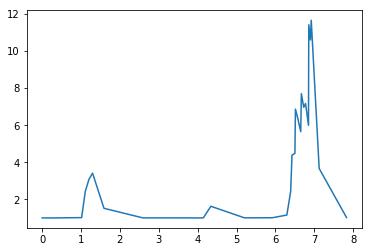

In [3]:
a = thinning_algo(T = 10, lambda_0 = 1, alpha = 3, beta = 8)
a

Number of Arrival Times: 143


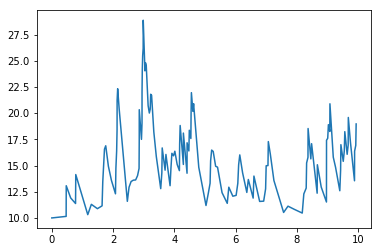

In [4]:
b = thinning_algo(T = 10, lambda_0 = 10, alpha = 3, beta = 8)
b

Number of Arrival Times: 1587


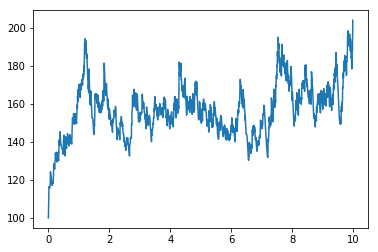

In [5]:
c = thinning_algo(T = 10, lambda_0 = 100, alpha = 3, beta = 8)
c

**Conclusion:** We can understand that increasing the value of lambda_0 increases the number of Arrival Times.

---
# For T, alpha and lambda_0 fixed, we increase beta

We test the Thinning algorithm for increasing values of beta. Here are some examples:

Number of Arrival Times: 122


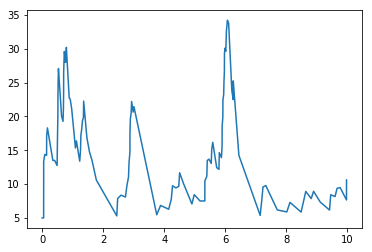

In [6]:
e = thinning_algo(T = 10, lambda_0 = 5, alpha = 3, beta = 5)
e

Number of Arrival Times: 66


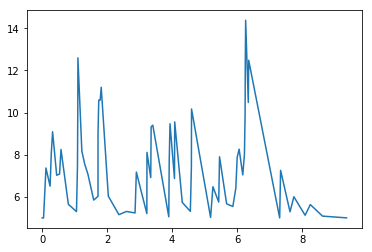

In [7]:
f = thinning_algo(T = 10, lambda_0 = 5, alpha = 3, beta = 10)
f

Number of Arrival Times: 44


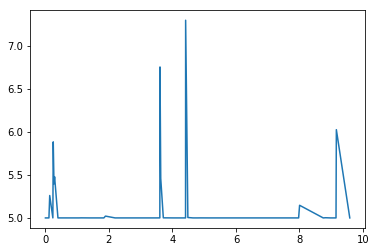

In [8]:
g = thinning_algo(T = 10, lambda_0 = 5, alpha = 3, beta = 100)
g

**Conclusion:** We can see here that increasing beta still gives us approximately the same number of Arrival Times. However, according to these graphs, it is clear that increasing beta makes the intensity function decays faster after an event has occurred.